In [2]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\lenovo\OneDrive\Documents\new\python.exe -m pip install --upgrade pip' command.


In [16]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inLine

<AxesSubplot:>

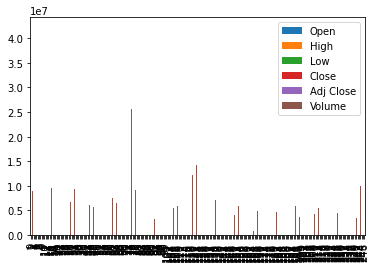

In [18]:
ril=pd.read_csv("C:/Users/lenovo/Downloads/RELIANCE.NS (1).csv")
ril.plot(kind='bar')

In [19]:
type(ril)

pandas.core.frame.DataFrame

In [20]:
ril.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,2274.207286,2297.113351,2248.459120,2271.512151,2269.827855,7.050719e+06
std,214.589888,216.947323,210.367297,213.887354,215.792416,4.187588e+06
min,1892.250000,1914.449951,1876.699951,1901.150024,1895.053833,7.871600e+05
25%,2096.599976,2111.349976,2080.750000,2088.550049,2088.066407,4.751403e+06
50%,2280.100098,2317.850098,2255.000000,2283.949951,2283.949951,6.081627e+06
75%,2436.050049,2459.525024,2406.474976,2429.349976,2429.349976,7.938278e+06
max,2742.750000,2751.350098,2708.000000,2731.850098,2731.850098,4.220969e+07


In [21]:
import matplotlib.pyplot as plt
import numpy as np

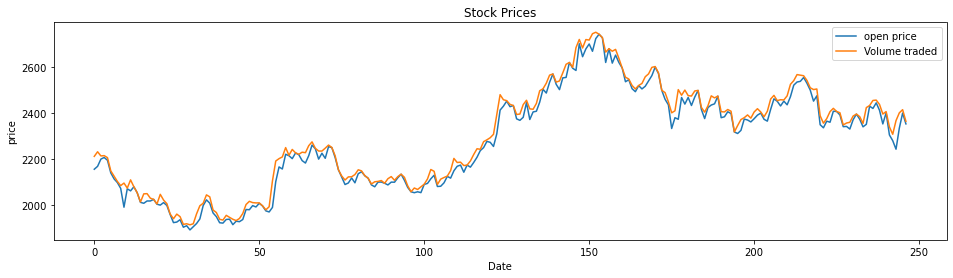

In [22]:
ril['Open'].plot(label='open price',figsize=(16,4))
ril['High'].plot(label='Volume traded',figsize=(16,4))
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Stock Prices')
plt.legend()
plt.show()

In [23]:
ril.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       247 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


<AxesSubplot:>

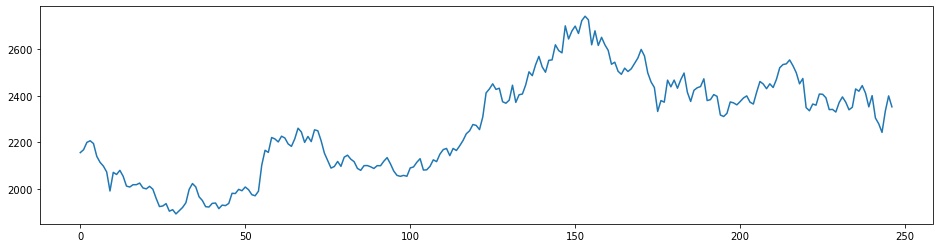

In [24]:
ril['Open'].plot(figsize=(16,4))

In [25]:
training_set=ril['Open']
training_set=pd.DataFrame(training_set)

In [26]:
#data_cleaning
ril.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [27]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [29]:
#creating a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,247):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

#Reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [30]:
!pip install keras

You should consider upgrading via the 'C:\Users\lenovo\OneDrive\Documents\new\python.exe -m pip install --upgrade pip' command.


In [31]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\lenovo\OneDrive\Documents\new\python.exe -m pip install --upgrade pip' command.


In [34]:
#Building the RNN
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [35]:
#initialising the RNN
regressor=Sequential()

In [36]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))

In [37]:
#Compelling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 6s 69ms/step - loss: 0.3203
Epoch 2/100
6/6 [==============================] - 0s 66ms/step - loss: 0.2104
Epoch 3/100
6/6 [==============================] - 1s 88ms/step - loss: 0.0964
Epoch 4/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0633
Epoch 5/100
6/6 [==============================] - 1s 94ms/step - loss: 0.0544
Epoch 6/100
6/6 [==============================] - 0s 78ms/step - loss: 0.0479
Epoch 7/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0445
Epoch 8/100
6/6 [==============================] - 0s 79ms/step - loss: 0.0439
Epoch 9/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0436
Epoch 10/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0430
Epoch 11/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0427
Epoch 12/100
6/6 [==============================] - 0s 81ms/step - loss: 0.0423
Epoch 13/100
6/6 [==============================]

In [38]:
#Making the prediction and visualizing the results
#Getting the real stock rice of 2021
dataset_test=pd.read_csv("C:/Users/lenovo/Downloads/RELIANCE.NS (1).csv",
                        index_col='Date',parse_dates=True)

In [39]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [40]:
dataset_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-05,2156.000000,2211.949951,2153.050049,2178.699951,2171.713623,11773630
2021-03-08,2168.500000,2231.899902,2168.000000,2191.100098,2184.073975,9002404
2021-03-09,2200.000000,2213.800049,2146.600098,2191.050049,2184.024170,6993792
2021-03-10,2207.000000,2215.100098,2170.250000,2181.949951,2174.953369,5316182
2021-03-12,2195.000000,2206.399902,2123.899902,2137.600098,2130.745605,7783173
...,...,...,...,...,...,...
2022-02-25,2280.100098,2307.949951,2276.250000,2283.949951,2283.949951,6724094
2022-02-28,2243.000000,2367.350098,2243.000000,2359.550049,2359.550049,9828768
2022-03-02,2334.449951,2401.000000,2329.199951,2398.550049,2398.550049,9909226


In [41]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2021-03-05 to 2022-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB
